<a id="1"></a>
# <p style="background-color:#4B0082;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">📚 IMPORTING LIBRARIES</p>

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

<a id="2"></a>
# <p style="background-color:#4B0082;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">📖 LOADING DATA</p>

In [2]:
df = pd.read_csv("hotel_booking.csv")

<a id="3"></a>
# <p style="background-color:#4B0082;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">🧐 Data Overview</p>

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [5]:
df.drop(['credit_card', 'phone-number', 'agent', 'company', 'arrival_date_year','arrival_date_month', 'email', 'name','reservation_status_date'], axis=1, inplace= True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 27 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_week_number        119390 non-null  int64  
 4   arrival_date_day_of_month       119390 non-null  int64  
 5   stays_in_weekend_nights         119390 non-null  int64  
 6   stays_in_week_nights            119390 non-null  int64  
 7   adults                          119390 non-null  int64  
 8   children                        119386 non-null  float64
 9   babies                          119390 non-null  int64  
 10  meal                            119390 non-null  object 
 11  country                         118902 non-null  object 
 12  market_segment  

Markdown
<a id="4"></a>
# <p style="background-color:#4B0082;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">📊 EDA</p>


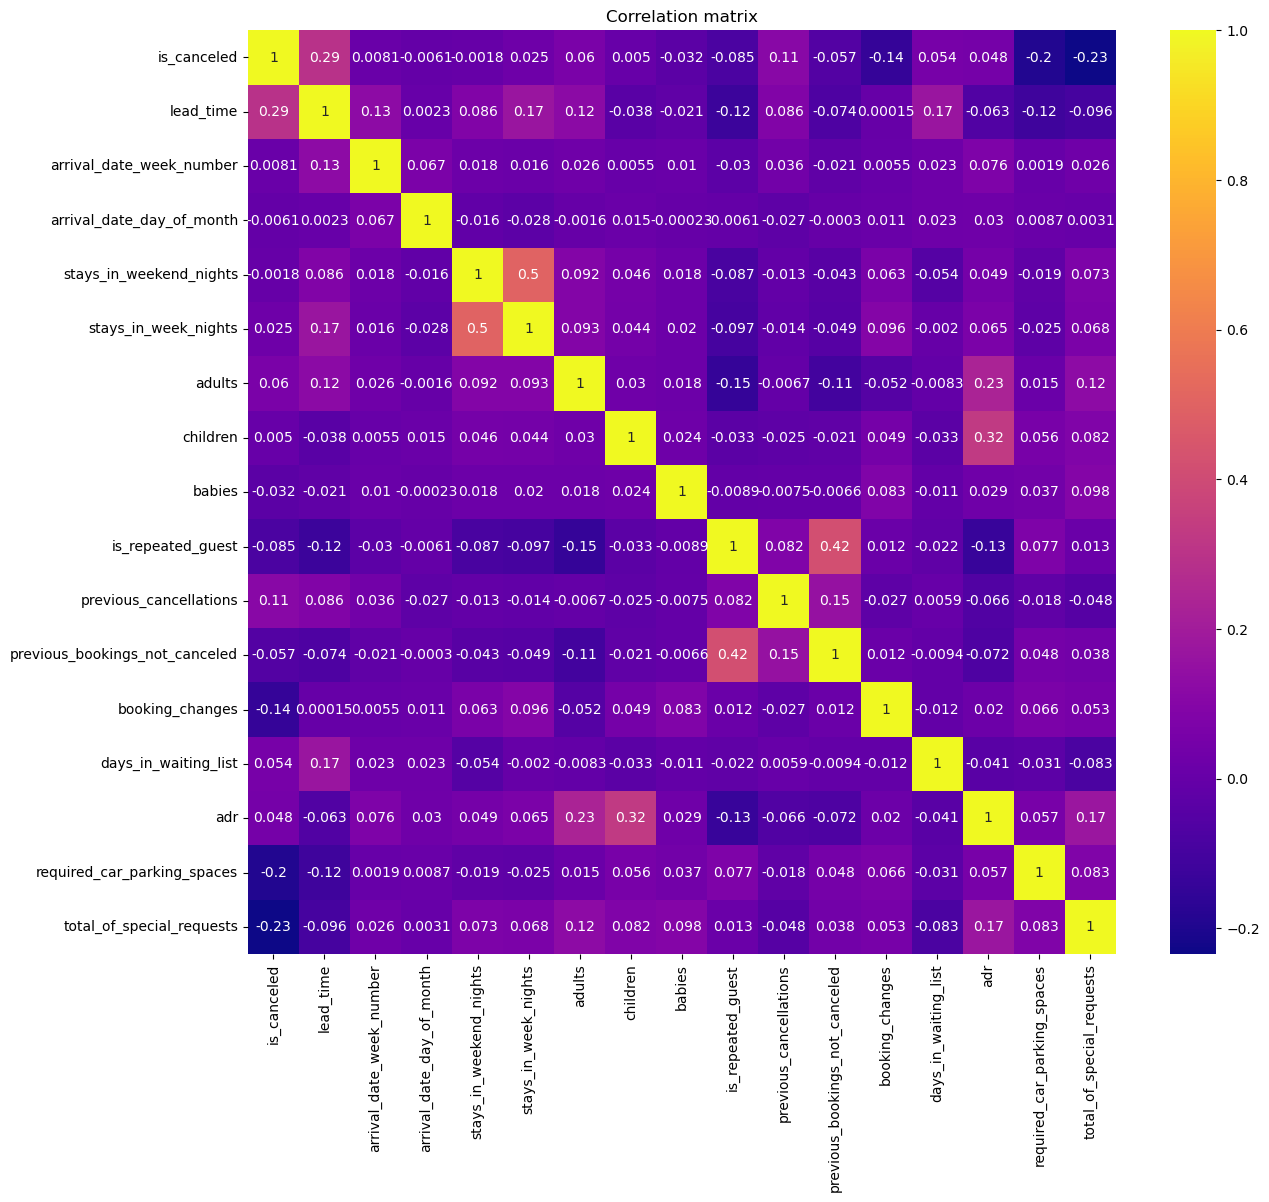

In [8]:
numeric_columns = df.select_dtypes(include=["int", "float"]).columns
df = df[numeric_columns]
corr_matrix = df.corr()
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, cmap='plasma')
plt.title(f'Correlation matrix')
plt.show()

In [9]:
df.describe()

,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


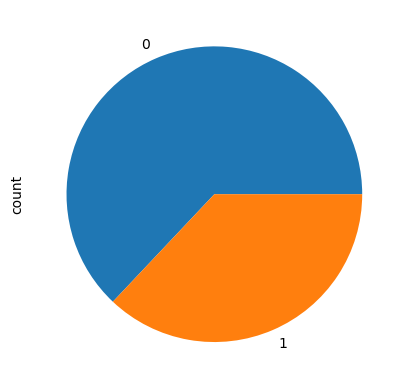

In [10]:
df['is_canceled'].value_counts().plot(kind='pie');

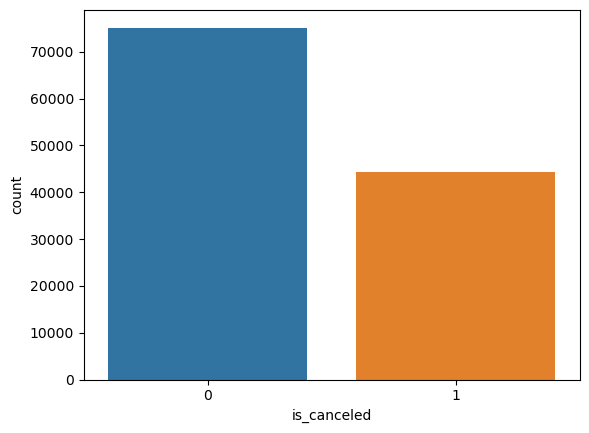

In [11]:
sns.countplot(data = df , x='is_canceled');

In [12]:
df['is_canceled'].value_counts()/df['is_canceled'].count()*100

is_canceled
0    62.958372
1    37.041628
Name: count, dtype: float64

In [16]:
df['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

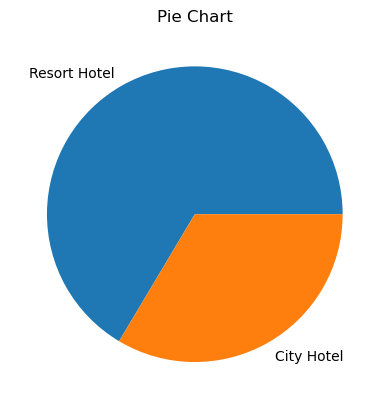

In [17]:
fig, ax = plt.subplots()
ax.pie(df['hotel'].value_counts(), labels=df['hotel'].unique())
ax.set_title('Pie Chart')
plt.show()

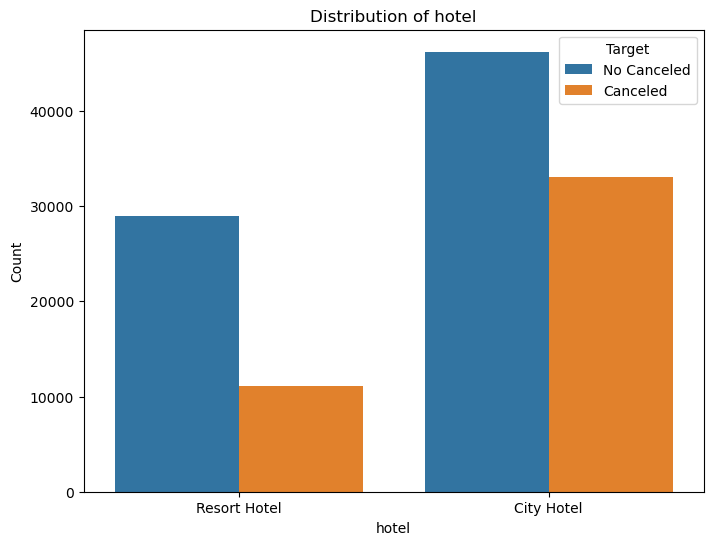

In [18]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='hotel', hue='is_canceled' )
plt.title('Distribution of hotel')
plt.xlabel('hotel')
plt.ylabel('Count')
plt.legend(title='Target', labels=['No Canceled', 'Canceled'])
plt.show()

In [19]:
df['hotel'].value_counts()/df['hotel'].count()*100

hotel
City Hotel      66.446101
Resort Hotel    33.553899
Name: count, dtype: float64

In [20]:
df['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [21]:
df['market_segment'].value_counts()/df['market_segment'].count()*100

market_segment
Online TA        47.304632
Offline TA/TO    20.285619
Groups           16.593517
Direct           10.558673
Corporate         4.435045
Complementary     0.622330
Aviation          0.198509
Undefined         0.001675
Name: count, dtype: float64

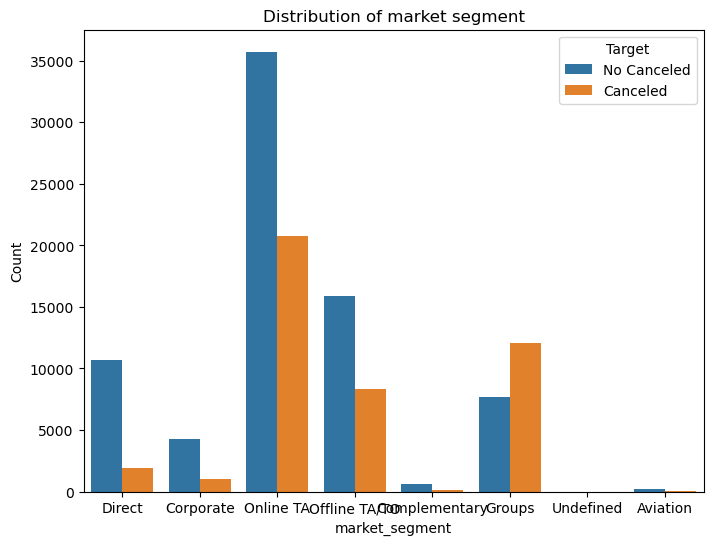

In [22]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='market_segment', hue='is_canceled' )
plt.title('Distribution of market segment')
plt.xlabel('market_segment')
plt.ylabel('Count')
plt.legend(title='Target', labels=['No Canceled', 'Canceled'])
plt.show()

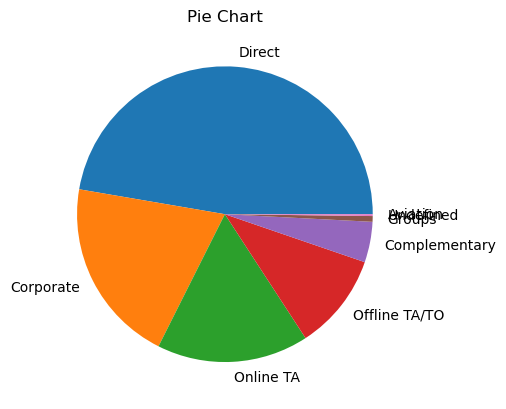

In [23]:
fig, ax = plt.subplots()
ax.pie(df['market_segment'].value_counts(), labels=df['market_segment'].unique())
ax.set_title('Pie Chart')
plt.show()

In [24]:
df['distribution_channel'].unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [25]:
df['distribution_channel'].value_counts()/df['distribution_channel'].count()*100

distribution_channel
TA/TO        81.975040
Direct       12.266521
Corporate     5.592596
GDS           0.161655
Undefined     0.004188
Name: count, dtype: float64

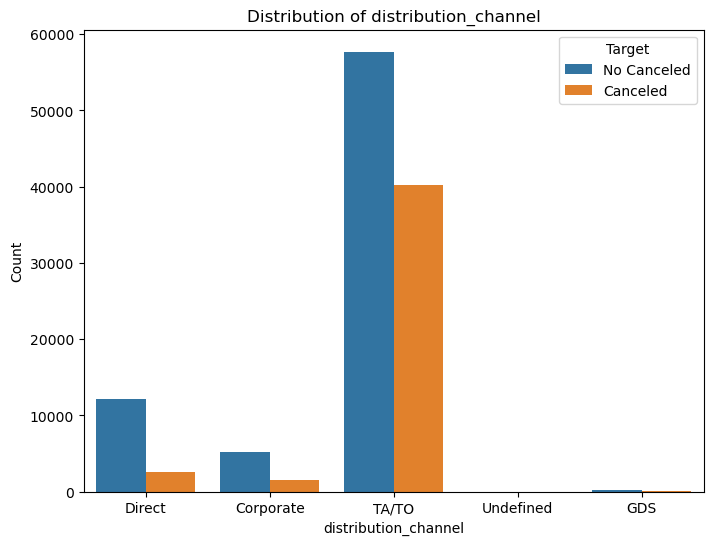

In [26]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='distribution_channel', hue='is_canceled' )
plt.title('Distribution of distribution_channel')
plt.xlabel('distribution_channel')
plt.ylabel('Count')
plt.legend(title='Target', labels=['No Canceled', 'Canceled'])
plt.show()

In [27]:
df['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [28]:
df['meal'].value_counts()/df['meal'].count()*100

meal
BB           77.318033
HB           12.114080
SC            8.920345
Undefined     0.979144
FB            0.668398
Name: count, dtype: float64

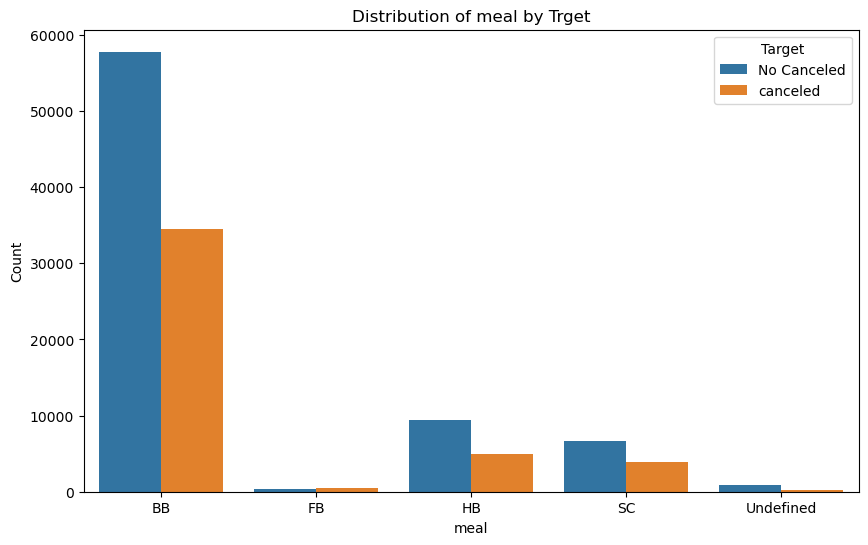

In [29]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='meal', hue='is_canceled')
plt.title('Distribution of meal by Trget')
plt.xlabel('meal')
plt.ylabel('Count')
plt.legend(title='Target', labels=['No Canceled', 'canceled'])
plt.show()

In [30]:
df['deposit_type'].unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

In [31]:
deposit_type_values_count = df['deposit_type'].value_counts()
deposit_type_values_count

deposit_type
No Deposit    104641
Non Refund     14587
Refundable       162
Name: count, dtype: int64

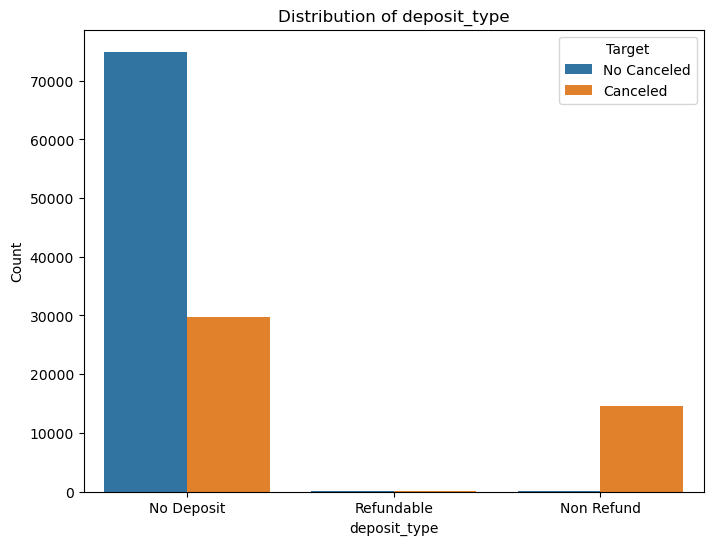

In [32]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='deposit_type', hue='is_canceled')
plt.title('Distribution of deposit_type')
plt.xlabel('deposit_type')
plt.ylabel('Count')
plt.legend(title='Target', labels=['No Canceled', 'Canceled'])
plt.show()

In [33]:
df['customer_type'].unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

In [34]:
customer_type_values_count = df['customer_type'].value_counts()
customer_type_values_count

customer_type
Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: count, dtype: int64

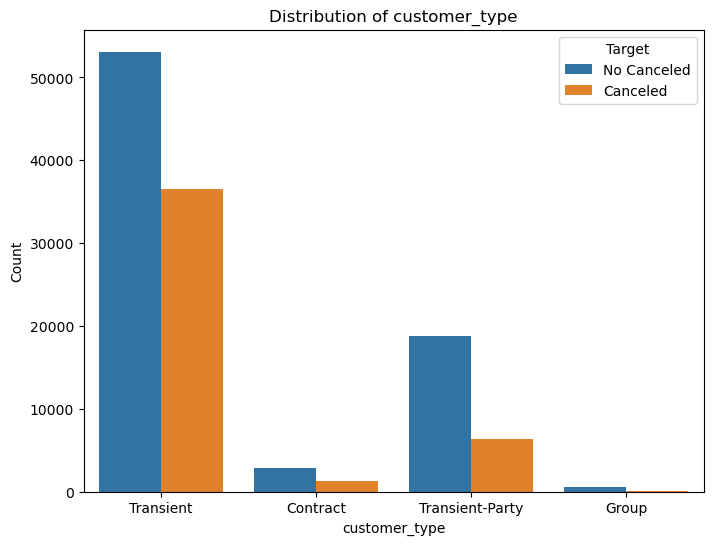

In [35]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='customer_type', hue='is_canceled')
plt.title('Distribution of customer_type')
plt.xlabel('customer_type')
plt.ylabel('Count')
plt.legend(title='Target', labels=['No Canceled', 'Canceled'])
plt.show()

In [36]:
df['reservation_status'].unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

In [37]:
reservation_status_values_count = df['reservation_status'].value_counts()
reservation_status_values_count

reservation_status
Check-Out    75166
Canceled     43017
No-Show       1207
Name: count, dtype: int64

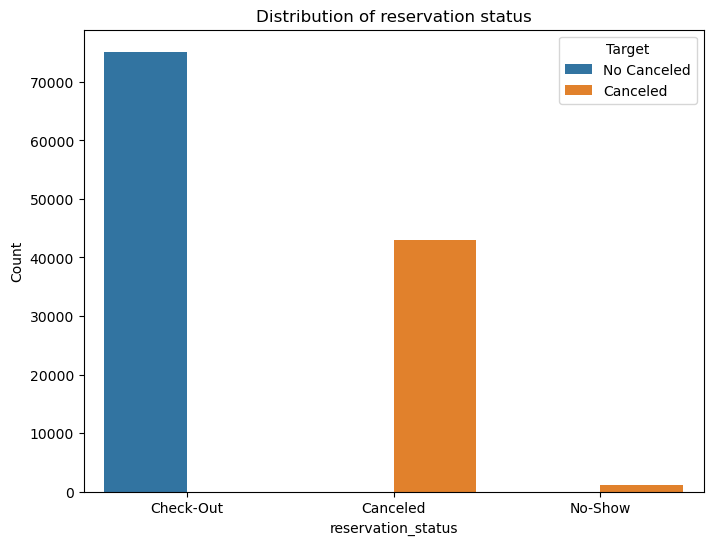

In [38]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='reservation_status', hue='is_canceled')
plt.title('Distribution of reservation status')
plt.xlabel('reservation_status')
plt.ylabel('Count')
plt.legend(title='Target', labels=['No Canceled', 'Canceled'])
plt.show()

In [39]:
df["reserved_room_type"].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'P', 'B'], dtype=object)

In [40]:
reserved_room_type_values_count = df['reserved_room_type'].value_counts()
reserved_room_type_values_count

reserved_room_type
A    85994
D    19201
E     6535
F     2897
G     2094
B     1118
C      932
H      601
P       12
L        6
Name: count, dtype: int64

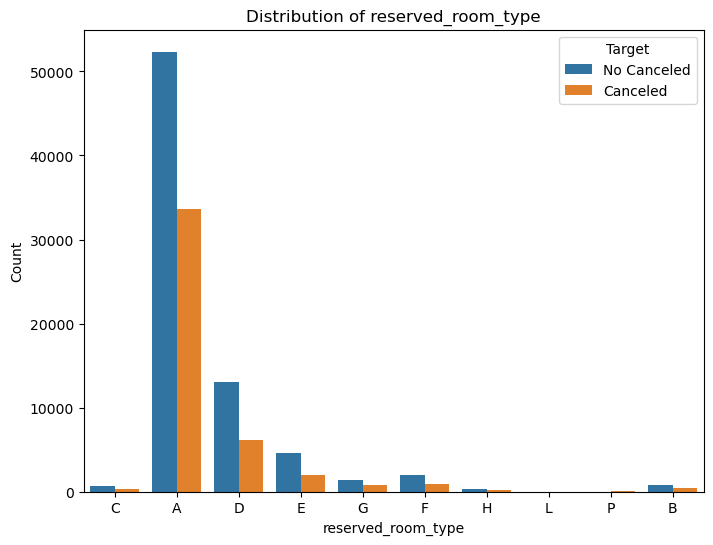

In [41]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='reserved_room_type', hue='is_canceled')
plt.title('Distribution of reserved_room_type')
plt.xlabel('reserved_room_type')
plt.ylabel('Count')
plt.legend(title='Target', labels=['No Canceled', 'Canceled'])
plt.show()

In [42]:
df["assigned_room_type"].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'I', 'B', 'H', 'P', 'L', 'K'],
      dtype=object)

In [43]:
reserved_room_type_values_count = df['assigned_room_type'].value_counts()
reserved_room_type_values_count

assigned_room_type
A    74053
D    25322
E     7806
F     3751
G     2553
C     2375
B     2163
H      712
I      363
K      279
P       12
L        1
Name: count, dtype: int64

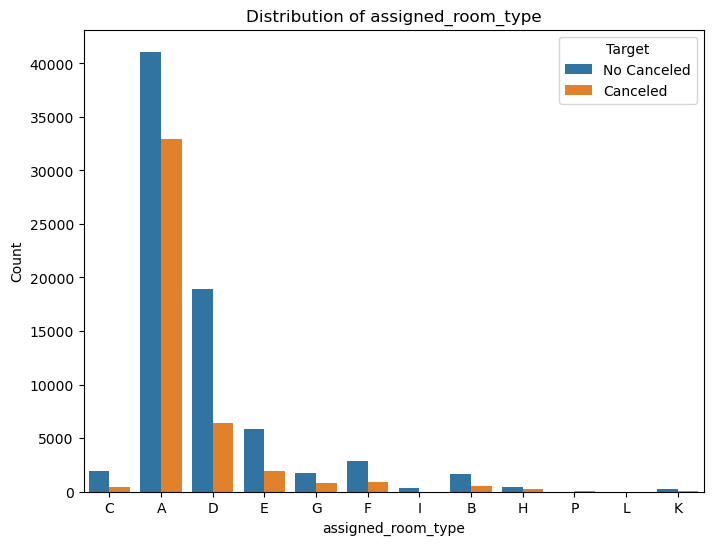

In [44]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='assigned_room_type', hue='is_canceled')
plt.title('Distribution of assigned_room_type')
plt.xlabel('assigned_room_type')
plt.ylabel('Count')
plt.legend(title='Target', labels=['No Canceled', 'Canceled'])
plt.show()

In [45]:
df["country"].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'E

<a id="5"></a>
# <p style="background-color:#4B0082;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">🧹 Preprocessing </p>

# Outliers

In [6]:
numeric_columns = df.select_dtypes(include=["int", "float"]).columns
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
outliers_count_specified = ((df[numeric_columns] < (Q1 - 1.5 * IQR)) | (df[numeric_columns] > (Q3 + 1.5 * IQR))).sum()

outliers_count_specified

is_canceled                           0
lead_time                          3005
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights             265
stays_in_week_nights               3354
adults                            29710
children                           8590
babies                              917
is_repeated_guest                  3810
previous_cancellations             6484
previous_bookings_not_canceled     3620
booking_changes                   18076
days_in_waiting_list               3698
adr                                3793
required_car_parking_spaces        7416
total_of_special_requests          2877
dtype: int64

In [ ]:

#Q1 = df[numeric_columns].quantile(0.25)
#Q3 = df[numeric_columns].quantile(0.75)
#IQR = Q3 - Q1
#threshold = 1.5
#outliers = (df[numeric_columns] < (Q1 - threshold * IQR)) | (df[num_features] > (Q3 + threshold * IQR))
#df = df[~outliers.any(axis=1)]

# OHE

In [5]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df['hotel'] = label_encoder.fit_transform(df['hotel'])
df['country'] = label_encoder.fit_transform(df['country'])
df['market_segment'] = label_encoder.fit_transform(df['market_segment'])
df['reserved_room_type'] = label_encoder.fit_transform(df['reserved_room_type'])
df['assigned_room_type'] = label_encoder.fit_transform(df['assigned_room_type'])
df

,hotel,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,1,0,342,27,1,0,0,2,0.0,0,...,2,2,3,No Deposit,0,Transient,0.00,0,0,Check-Out
1,1,0,737,27,1,0,0,2,0.0,0,...,2,2,4,No Deposit,0,Transient,0.00,0,0,Check-Out
2,1,0,7,27,1,0,1,1,0.0,0,...,0,2,0,No Deposit,0,Transient,75.00,0,0,Check-Out
3,1,0,13,27,1,0,1,1,0.0,0,...,0,0,0,No Deposit,0,Transient,75.00,0,0,Check-Out
4,1,0,14,27,1,0,2,2,0.0,0,...,0,0,0,No Deposit,0,Transient,98.00,0,1,Check-Out
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,0,23,35,30,2,5,2,0.0,0,...,0,0,0,No Deposit,0,Transient,96.14,0,0,Check-Out
119386,0,0,102,35,31,2,5,3,0.0,0,...,4,4,0,No Deposit,0,Transient,225.43,0,2,Check-Out
119387,0,0,34,35,31,2,5,2,0.0,0,...,3,3,0,No Deposit,0,Transient,157.71,0,4,Check-Out
119388,0,0,109,35,31,2,5,2,0.0,0,...,0,0,0,No Deposit,0,Transient,104.40,0,0,Check-Out


In [6]:
df = pd.get_dummies(df, columns=['distribution_channel', 'meal', 'deposit_type', 'customer_type', 'reservation_status'], dtype = int)
df

,hotel,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Canceled,reservation_status_Check-Out,reservation_status_No-Show
0,1,0,342,27,1,0,0,2,0.0,0,...,1,0,0,0,0,1,0,0,1,0
1,1,0,737,27,1,0,0,2,0.0,0,...,1,0,0,0,0,1,0,0,1,0
2,1,0,7,27,1,0,1,1,0.0,0,...,1,0,0,0,0,1,0,0,1,0
3,1,0,13,27,1,0,1,1,0.0,0,...,1,0,0,0,0,1,0,0,1,0
4,1,0,14,27,1,0,2,2,0.0,0,...,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,0,23,35,30,2,5,2,0.0,0,...,1,0,0,0,0,1,0,0,1,0
119386,0,0,102,35,31,2,5,3,0.0,0,...,1,0,0,0,0,1,0,0,1,0
119387,0,0,34,35,31,2,5,2,0.0,0,...,1,0,0,0,0,1,0,0,1,0
119388,0,0,109,35,31,2,5,2,0.0,0,...,1,0,0,0,0,1,0,0,1,0


# missing

In [8]:
from sklearn.impute import KNNImputer

data_array = df[['country', 'children']].values
knn_imputer = KNNImputer(n_neighbors=5)  
data_array_imputed = knn_imputer.fit_transform(data_array)
df[['country', 'children']] = data_array_imputed

<a id="6"></a>
# <p style="background-color:#4B0082;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">✂️ SPLITING DATA</p>

In [9]:
X = df.drop(['is_canceled'] , axis=1)
y = df['is_canceled']

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split (X , y , test_size=0.3 , random_state=101)


<a id="7"></a>
# <p style="background-color:#4B0082;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">📐 Scaling</p>


In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()

In [13]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<a id="8"></a>
# <p style="background-color:#4B0082;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">💡 MODELS</p>


# 1️⃣ DecisionTree 🌲🪵

In [84]:
from sklearn.metrics import f1_score , classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import make_scorer, recall_score

model = DecisionTreeClassifier()

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


recall_scorer = make_scorer(recall_score, pos_label=1)

grid_search = GridSearchCV(model, param_grid, scoring=recall_scorer, cv=5)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Best Parameters:", best_params)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22592
           1       1.00      1.00      1.00     13225

    accuracy                           1.00     35817
   macro avg       1.00      1.00      1.00     35817
weighted avg       1.00      1.00      1.00     35817



# 2️⃣ RandomForest 🌲🌴🪵

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestClassifier()
grid_searchrandom = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring = 'f1', cv=3,verbose=10)
grid_searchrandom.fit(X_train, y_train)



Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV 1/3; 1/81] START max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 1/3; 1/81] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=1.000 total time=   3.0s
[CV 2/3; 1/81] START max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 2/3; 1/81] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=1.000 total time=   2.9s
[CV 3/3; 1/81] START max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 3/3; 1/81] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=1.000 total time=   3.1s
[CV 1/3; 2/81] START max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 1/3; 2/81] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=1.000 total time=   6.7s
[CV 2/3; 2/81] START max_depth=None, min_samples_leaf=

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='f1', verbose=10)

In [21]:
from sklearn.metrics import f1_score , classification_report
best_params = grid_searchrandom.best_params_
best_model = grid_searchrandom.best_estimator_
best_f1 = grid_searchrandom.best_score_
y_predrandom = best_model.predict(X_test)
print("Best Parameters:", best_params)
print("\nClassification Report:")
print(classification_report(y_test, y_predrandom))

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22592
           1       1.00      1.00      1.00     13225

    accuracy                           1.00     35817
   macro avg       1.00      1.00      1.00     35817
weighted avg       1.00      1.00      1.00     35817



# 3️⃣ SVM

In [14]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
params = {
    'C':range(1,30),
    'kernel':['linear', 'rbf'],
    'gamma': ['auto', 0.001, 0.01, 0.1, 0.5]

}
gsh = GridSearchCV(SVC(), param_grid= params, scoring='f1', cv=3, verbose=10)
gsh.fit(X_train,y_train)


Fitting 3 folds for each of 290 candidates, totalling 870 fits
[CV 1/3; 1/290] START C=1, gamma=auto, kernel=linear............................
[CV 1/3; 1/290] END C=1, gamma=auto, kernel=linear;, score=1.000 total time=   0.3s
[CV 2/3; 1/290] START C=1, gamma=auto, kernel=linear............................
[CV 2/3; 1/290] END C=1, gamma=auto, kernel=linear;, score=1.000 total time=   0.3s
[CV 3/3; 1/290] START C=1, gamma=auto, kernel=linear............................
[CV 3/3; 1/290] END C=1, gamma=auto, kernel=linear;, score=1.000 total time=   0.5s
[CV 1/3; 2/290] START C=1, gamma=auto, kernel=rbf...............................
[CV 1/3; 2/290] END C=1, gamma=auto, kernel=rbf;, score=1.000 total time=  18.8s
[CV 2/3; 2/290] START C=1, gamma=auto, kernel=rbf...............................
[CV 2/3; 2/290] END C=1, gamma=auto, kernel=rbf;, score=1.000 total time=  18.8s
[CV 3/3; 2/290] START C=1, gamma=auto, kernel=rbf...............................
[CV 3/3; 2/290] END C=1, gamma=auto, 

NameError: name 'best_recall' is not defined

In [15]:
best_params = gsh.best_params_
best_f1 = gsh.best_score_

print("Best Parameters:", best_params)
print("Best f1 Score:", best_f1)

Best Parameters: {'C': 1, 'gamma': 'auto', 'kernel': 'linear'}
Best f1 Score: 1.0


# 4️⃣ KNeighbors

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score , classification_report
knn = KNeighborsClassifier()
k_range = list(range(1, 30))
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, cv=5, scoring='f1', return_train_score=False,verbose=10)
grid_searchknn=grid.fit(X_train, y_train)
best_params = grid_searchknn.best_params_
best_model = grid_searchknn.best_estimator_
best_f1 = grid_searchknn.best_score_
y_predknn = best_model.predict(X_test)
print("Best Parameters:", best_params)
print("\nClassification Report:")
print(classification_report(y_test, y_predknn))

Fitting 5 folds for each of 29 candidates, totalling 145 fits
[CV 1/5; 1/29] START n_neighbors=1..............................................
[CV 1/5; 1/29] END ...............n_neighbors=1;, score=0.736 total time=   3.6s
[CV 2/5; 1/29] START n_neighbors=1..............................................
[CV 2/5; 1/29] END ...............n_neighbors=1;, score=0.734 total time=   3.6s
[CV 3/5; 1/29] START n_neighbors=1..............................................
[CV 3/5; 1/29] END ...............n_neighbors=1;, score=0.731 total time=   3.6s
[CV 4/5; 1/29] START n_neighbors=1..............................................
[CV 4/5; 1/29] END ...............n_neighbors=1;, score=0.724 total time=   3.7s
[CV 5/5; 1/29] START n_neighbors=1..............................................
[CV 5/5; 1/29] END ...............n_neighbors=1;, score=0.731 total time=   3.7s
[CV 1/5; 2/29] START n_neighbors=2..............................................
[CV 1/5; 2/29] END ...............n_neighbors=2